In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import math
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 5
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_df = pd.read_csv('lab3_dataset.csv')
data_df.head()

,age,likes_dog,likes_gravity,going_to_be_an_astronaut
0,24,0,0,0
1,30,1,1,1
2,36,0,1,1
3,36,0,0,0
4,42,0,0,0


In [4]:
data_df.describe()

,age,likes_dog,likes_gravity,going_to_be_an_astronaut
count,31.000000,31.000000,31.000000,31.000000
mean,47.000000,0.548387,0.516129,0.612903
std,17.825076,0.505879,0.508001,0.495138
min,11.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000
50%,47.000000,1.000000,1.000000,1.000000
75%,58.000000,1.000000,1.000000,1.000000
max,99.000000,1.000000,1.000000,1.000000


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       31 non-null     int64
 1   likes_dog                 31 non-null     int64
 2   likes_gravity             31 non-null     int64
 3   going_to_be_an_astronaut  31 non-null     int64
dtypes: int64(4)
memory usage: 1.1 KB


1. There are no missing values in the dataset. As shown by .info() there are a total of 31 entries and 31 non-null in all columns.

In [6]:
#2 Split the data
X = data_df[['age', 'likes_dog','likes_gravity']]
y = data_df['going_to_be_an_astronaut']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [7]:
#3 GINI
data_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=5)

#fit the model 
data_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=5)

In [8]:
# predict on test set 
y_pred_gini = data_gini.predict(X_test)

In [9]:
#4 Evaluate the model
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f"Accuracy score: {accuracy_gini:.4f}")

precision_gini = precision_score(y_test, y_pred_gini)
print(f"Precision score: {precision_gini:.4f}")

recall_gini = recall_score(y_test, y_pred_gini)
print(f"Recall score: {recall_gini:.4f}")

Accuracy score: 0.5714
Precision score: 1.0000
Recall score: 0.5714


4. The evaluations score above show that the model accuracy rate is 57.14%, which is low means that the model is not very good at generalization. The precision score is 100% which means there is no false positive cases indicating overfitting. The recall of 57.14% indicates that some actual astronauts predictions are being not classified correctly. There is a general issue of overfitting happening in the current model.

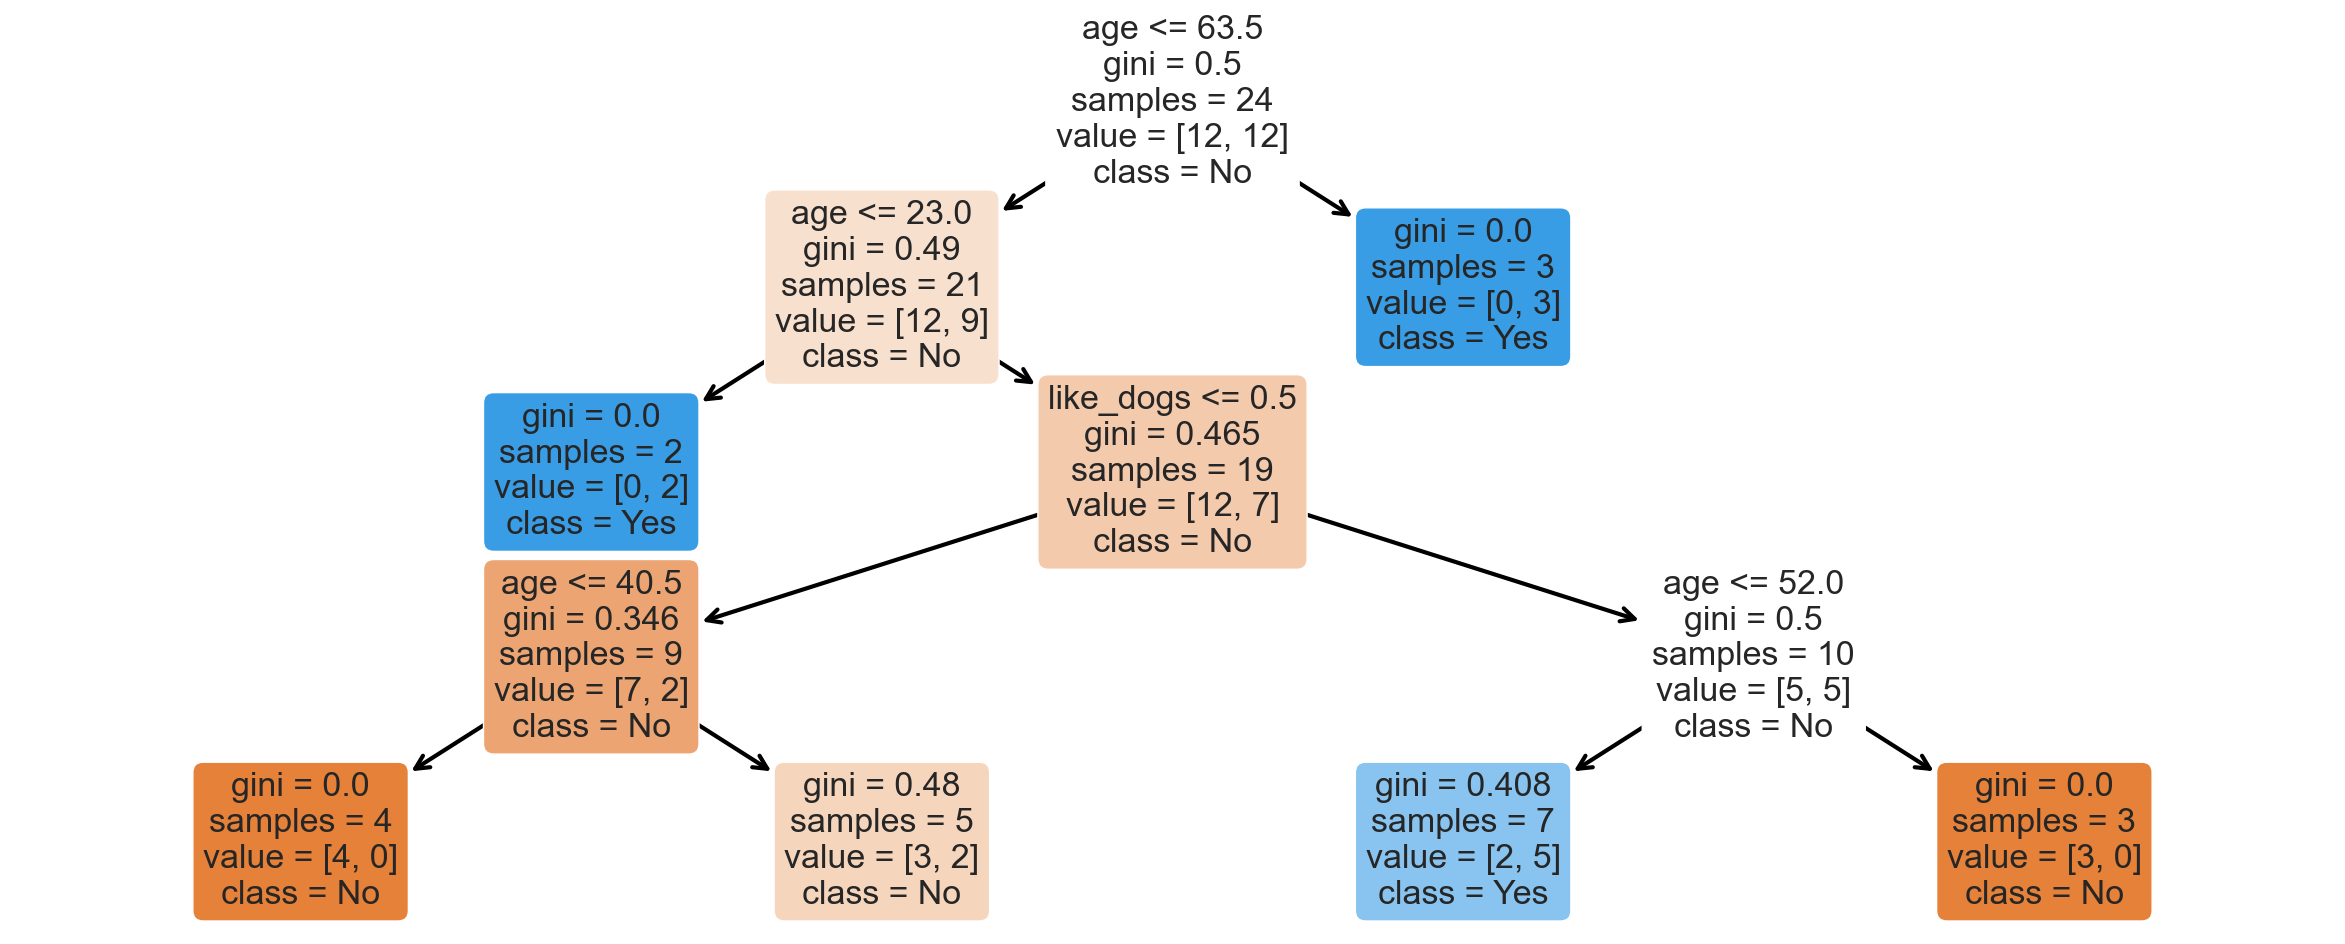

In [10]:
#plot tree

# tree for gini
fig, ax = plt.subplots(figsize=(30, 12))
out = tree.plot_tree(
    data_gini, filled=True, rounded=True,
    feature_names=['age', 'like_dogs', 'likes_gravity'], 
    class_names=['No', 'Yes']
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

In [11]:
#5 Entropy
data_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=5)

#fit model
data_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=5)

In [12]:
#predict the test set with entropy
y_pred_entropy = data_entropy.predict(X_test)

In [13]:
#6 Evaluate the model
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Accuracy score: {accuracy_entropy:.4f}")

precision_entropy = precision_score(y_test, y_pred_entropy)
print(f"Precision score: {precision_entropy:.4f}")

recall_entropy = recall_score(y_test, y_pred_entropy)
print(f"Recall score: {recall_entropy:.4f}")

Accuracy score: 0.2857
Precision score: 1.0000
Recall score: 0.2857


6. The evaluation score for entropy above show that it performed worse than that of gini. The accuracy score and recall score are only 28.57% meaning that the model is very bad at prediction and is struggling with generalization. The precision score of 100% with such low accuracy score show how bad the issue of overfitting is.

7. As said earlier, gini performs better than entropy based on the evaluation scores above. This might be because entropy has a max_depth of 5 making it overfit more while gini only had max_depth value of 4. The deeper the tree goes it increases the complexity and may cause issues of overfitting more, especially given that this is a small dataset. So in conclusion, gini is the better criteria in this case.

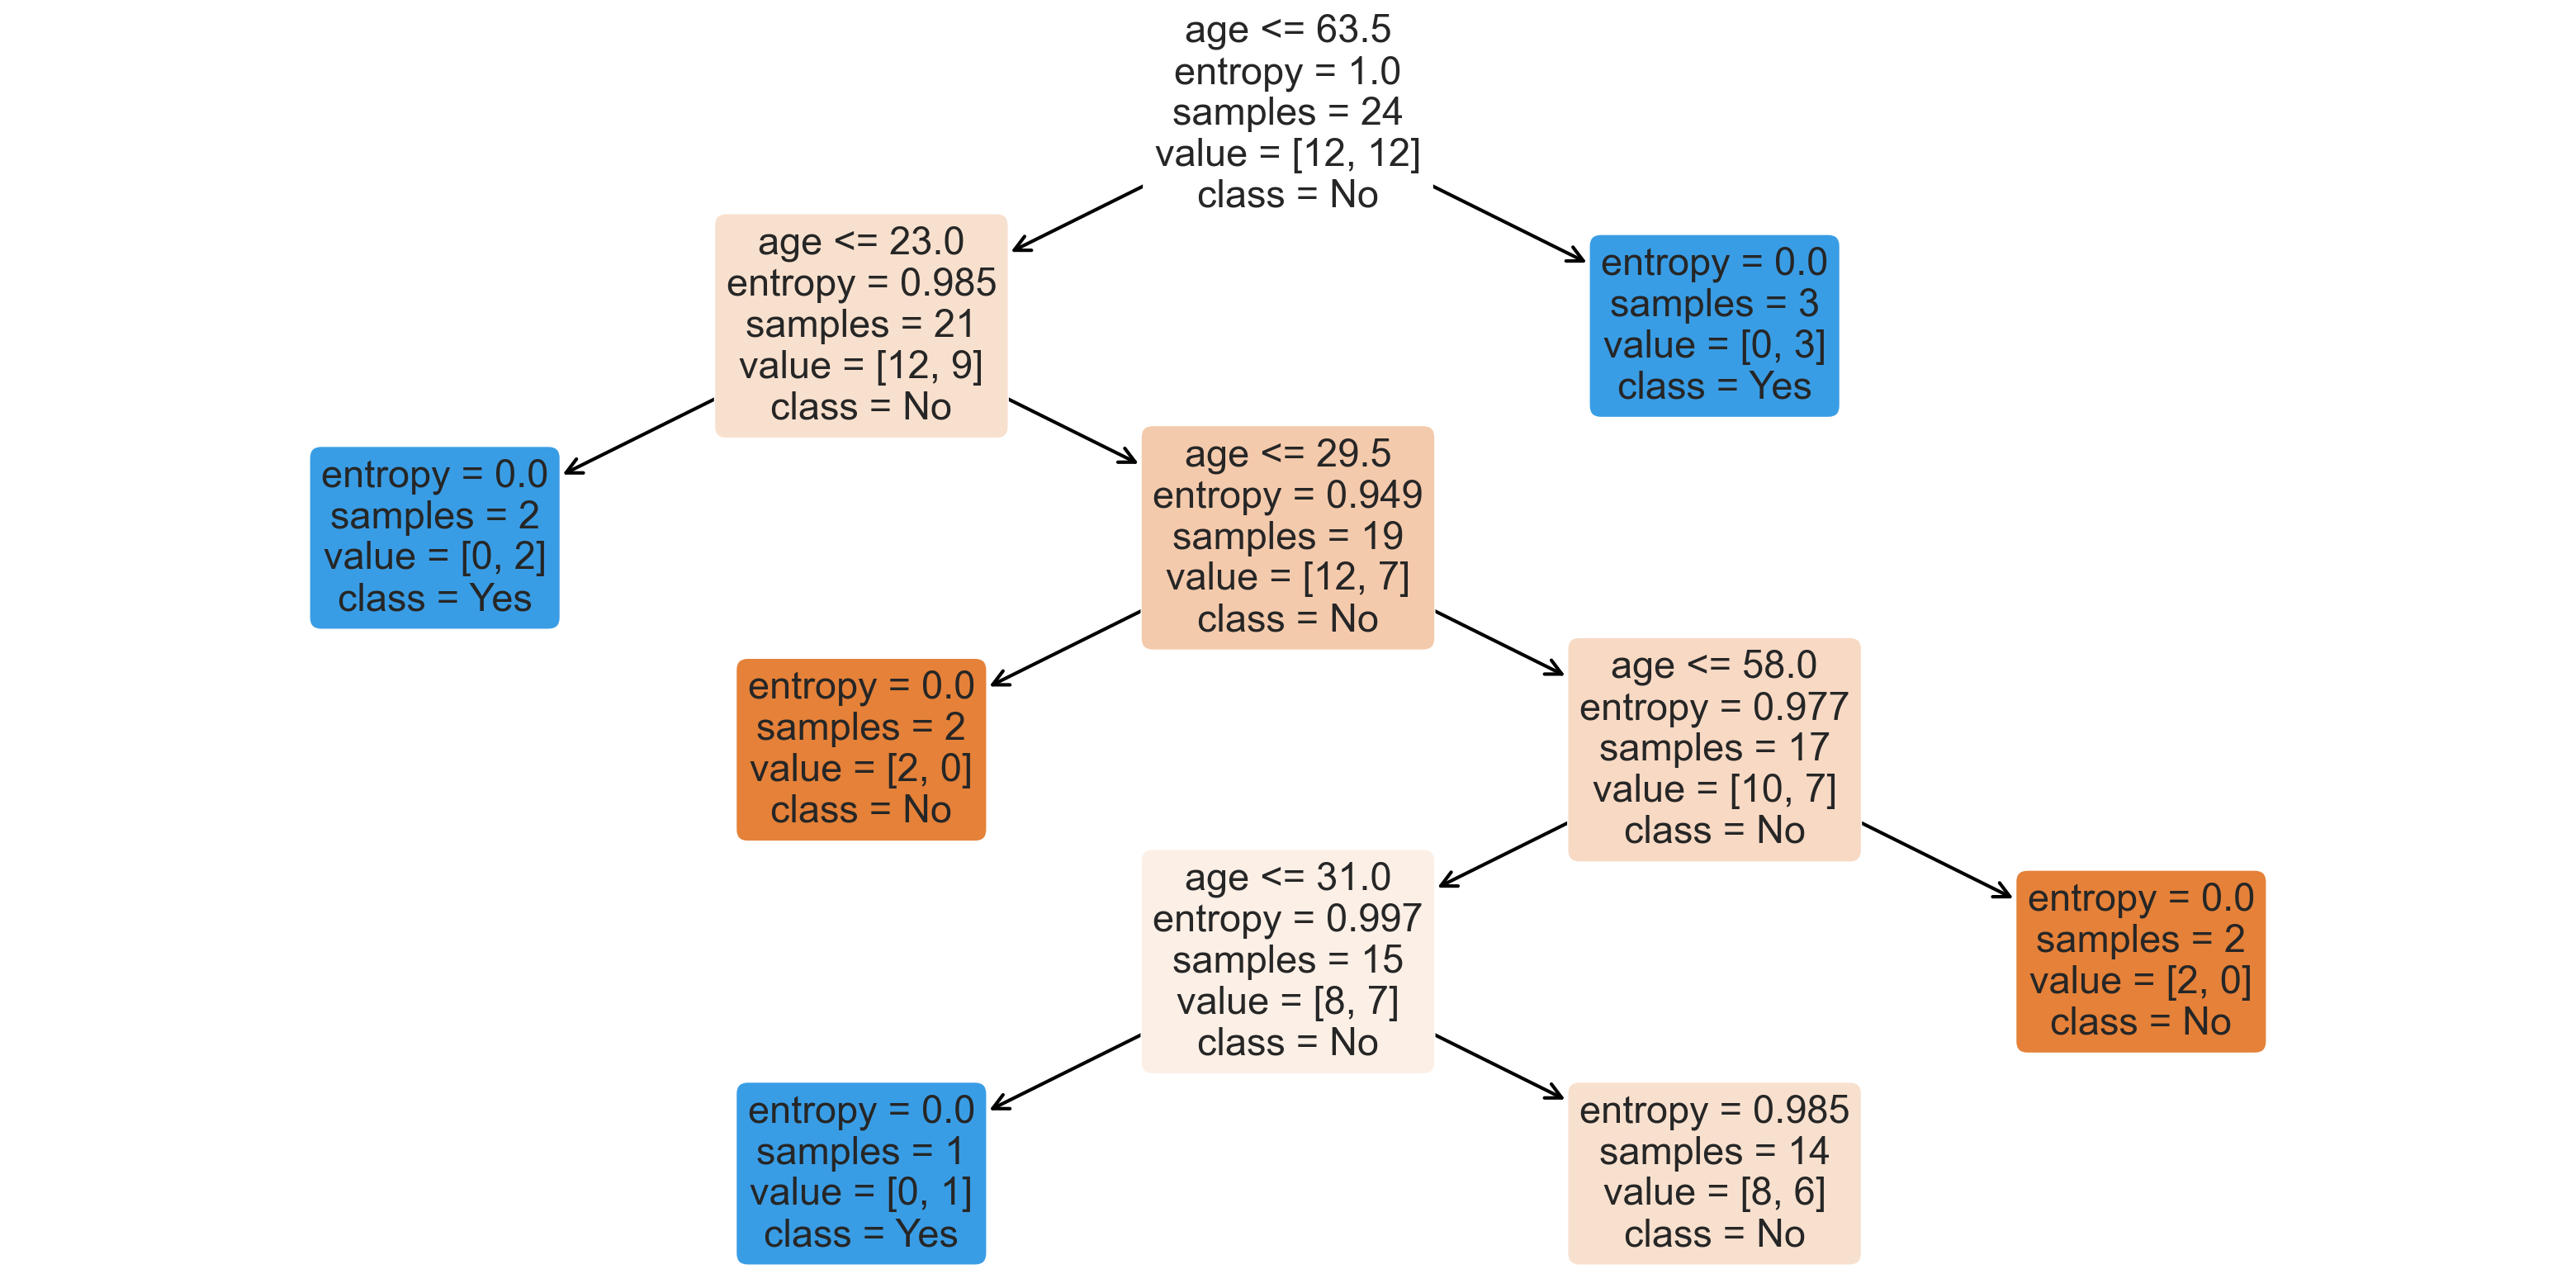

In [14]:
#plot tree

# tree for entropy
fig, ax = plt.subplots(figsize=(40, 20))
out = tree.plot_tree(
    data_entropy, filled=True, rounded=True,
    feature_names=['age', 'like_dogs', 'likes_gravity'], 
    class_names=['No', 'Yes']
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

In [15]:
#9 Real life example
new_data1 = [[33, 1, 0]] # age, likes_dog, likes_gravity format
prediction = data_gini.predict(new_data1) #with high accuracy model

#result
if prediction == 1:
     print("Will become an astronaut.")
else:
    print("Will not become an astronaut.")

Will become an astronaut.


In [18]:
#10 best max_depth

best_depth_gini = 0
best_accuracy_gini = 0
best_depth_entropy = 0
best_accuracy_entropy = 0

# Loop through max_depth from 1 to 21 for Gini criterion
for depth in range(1, 22):
    model_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=5)
    model_gini.fit(X_train, y_train)
    y_pred_gini = model_gini.predict(X_test)
    accuracy_gini = accuracy_score(y_test, y_pred_gini)
    
    if accuracy_gini > best_accuracy_gini:
        best_accuracy_gini = accuracy_gini
        best_depth_gini = depth

# Loop through max_depth from 1 to 21 for Entropy criterion
for depth in range(1, 22):
    model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=5)
    model_entropy.fit(X_train, y_train)
    y_pred_entropy = model_entropy.predict(X_test)
    accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
    
    if accuracy_entropy > best_accuracy_entropy:
        best_accuracy_entropy = accuracy_entropy
        best_depth_entropy = depth

print(f"Best max depth for Gini: {best_depth_gini}")
print(f"Best max depth for Entropy: {best_depth_entropy}")

Best max depth for Gini: 4
Best max depth for Entropy: 6


The depths are different for both. For Gini, the best max_depth is 4 which is shorter than that of entropy whose best max_depth is 6. This is probably because the model tries to achieve a balance between simplicity and performance while not overly complicating the model. Entropy on the other hand creates a more complex tree with deeper splits, but going beyond depth of 6 might cause even more overfitting issues leading to even less accuracy scores hence the best max_depth is at 6.

In [19]:
#11 Calacualting entropy of root node
p1 = np.mean(y_train)
p0 = 1 - p1

root_entropy = -(p1 * np.log2(p1) + p0 * np.log2(p0)) if p1 not in [0, 1] else 0
print(f"Root Entropy: {root_entropy:.4f}")


Root Entropy: 1.0000


In [26]:
#12 split based on likes_dogs and going_to_be_an_astronaut
df_train = pd.DataFrame(X_train, columns=['age', 'likes_dog', 'likes_gravity'])
df_train['going_to_be_an_astronaut'] = y_train

pivot_table = df_train.pivot_table(index='likes_dog', columns='going_to_be_an_astronaut', aggfunc='size', fill_value=0)

print(pivot_table)

going_to_be_an_astronaut  0  1
likes_dog                     
0                         7  4
1                         5  8


In [29]:
# 13 calculate entropy
def compute_entropy(class_counts):
    total = sum(class_counts)
    entropy = -sum((count / total) * np.log2(count / total) for count in class_counts if count > 0)
    return entropy

# Calculate entropy for each subset
entropy_likes_dog_0 = compute_entropy(pivot_table.loc[0]) #not liking dogs
entropy_likes_dog_1 = compute_entropy(pivot_table.loc[1]) # likes dogs

# Calculate weighted entropy after the split
total_samples = len(y_train)
weighted_entropy = (
    (pivot_table.loc[0].sum() / total_samples) * entropy_likes_dog_0 +
    (pivot_table.loc[1].sum() / total_samples) * entropy_likes_dog_1
)

# Calculate Information Gain
info_gain = root_entropy - weighted_entropy

print(f"Entropy for not liking dog (0): {entropy_likes_dog_0:.4f}")
print(f"Entropy for liking dog (1): {entropy_likes_dog_1:.4f}")
print(f"Weight after split: {weighted_entropy:.4f}")
print(f"Information Gain from likes_dog: {info_gain:.4f}")

Entropy for not liking dog (0): 0.9457
Entropy for liking dog (1): 0.9612
Weight after split: 0.9541
Information Gain from likes_dog: 0.0459


The information gain is very low at only 0.04 which means that the splitting based on likes_dogs does not improve the accuracy in classification. The entropy values which indicate the randomness show that for liking dogs and not liking dogs the entropy is either 0.94 or 0.96 which are very close to 1, and they are very high. This indicates that the data in both conatins a lot of randomness. The split does not reduce the uncertanity because the weight after the split is still very hight at 0.95, meaning this feature is not a very good one to predict going_to_be_an_astronaut. 